## How are in-demand skills trending for Data Analysts?

### Methodology
- aggregate skill counts monthly
- re-analyze based on percentage of total jobs
- plot the monthly skill demand

In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

my_dataset = load_dataset('lukebarousse/data_jobs')
df = my_dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

C:\Users\Andrzej\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_country'] == "United States")].copy()

In [3]:
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

In [4]:
df_DA_US_explode = df_DA_US.explode('job_skills')

In [7]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [10]:
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

In [11]:
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

<Axes: xlabel='job_posted_month_no'>

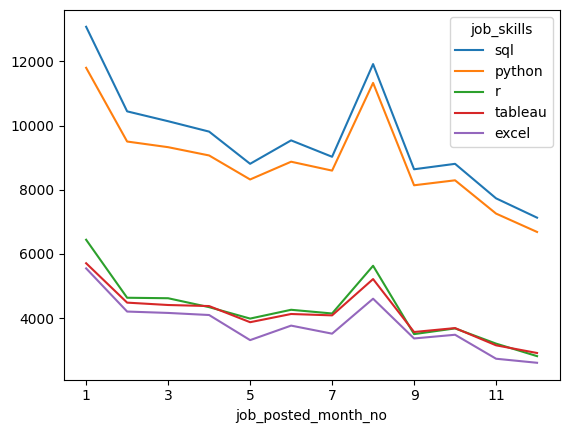

In [17]:
df_DA_US_pivot.iloc[:, :5].plot(kind='line')

In [19]:
DA_totals = df_DA_US.groupby('job_posted_month_no').size()

In [23]:
df_DA_US_percent = df_DA_US_pivot.div(DA_totals/100, axis=0)

In [25]:
df_DA_US_percent = df_DA_US_percent.reset_index()

df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(
    lambda x: pd.to_datetime(x, format='%m').strftime('%b'))


df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')


In [29]:
df_DA_US_percent = df_DA_US_percent.drop(columns='index')
df_DA_US_percent

job_skills,sql,python,r,tableau,excel,aws,sas,spark,azure,power bi,...,fastify,fedora,gtx,ionic,microsoft lists,ocaml,msaccess,mattermost,symfony,wsl
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,57.679753,52.042347,28.411998,25.183061,24.477283,16.996030,20.291134,14.521394,11.557124,12.143802,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004411,0.000000
Feb,57.941176,52.724750,25.715871,24.872364,23.329634,19.334073,18.579356,15.604883,13.396226,13.057714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,56.601877,52.083333,25.798704,24.620197,23.240617,19.615728,19.314120,14.974307,13.304290,12.572609,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005585
Apr,56.764263,52.464992,25.118621,25.315357,23.700961,18.533735,19.187594,14.292327,13.048258,13.135054,...,0.000000,0.000000,0.000000,0.005786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,57.626121,54.433030,26.074724,25.335340,21.684224,19.466073,18.779036,15.697180,14.081005,13.891252,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006543,0.000000,0.000000,0.000000
Jun,57.128310,53.144842,25.512160,24.727447,22.559003,18.683359,17.671020,14.981430,13.825326,14.088894,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,55.681678,53.022825,25.564466,25.200494,21.684146,18.642813,17.643430,14.657619,13.318939,13.479334,...,0.000000,0.006169,0.006169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,56.655095,53.868467,26.772552,24.803842,21.893576,17.818251,18.127348,14.213705,12.463741,13.196063,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,52.945504,49.886594,21.461411,21.865996,20.633850,18.145038,16.404095,13.970453,13.994973,12.603445,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


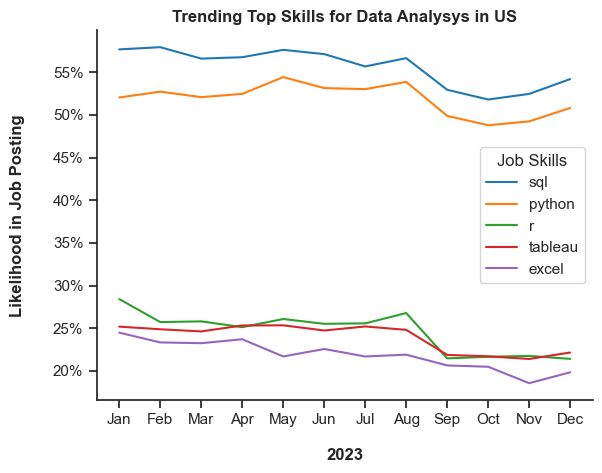

In [55]:
df_plot = df_DA_US_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysys in US', fontweight='bold')
plt.ylabel('Likelihood in Job Posting', fontweight='bold', labelpad=20) 
plt.xlabel('2023', fontweight='bold', labelpad=15)  
plt.legend(title='Job Skills')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.show()